# AML Homework 2 - Programming Exercises [Aashika Perunkolam]

## Question 1: Binary Classification on Text Data

In [1]:
# Pandas helps to load data
import pandas as pd 
# Numpy helps perform computational operations
import numpy as np
# Matplotlib and Seaborn is used for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# To enable plots appear within Jupyter Notebook
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from nltk.stem import *
import nltk.corpus
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

### (a) Download the Data

In [2]:
#Load Dataset
train_data = pd.read_csv("/Users/aashikaperunkolam/Documents/Fall 2022/AML/HW2 /nlp-getting-started/train.csv")
test_data = pd.read_csv("/Users/aashikaperunkolam/Documents/Fall 2022/AML/HW2 /nlp-getting-started/test.csv")

#### a) (1) How many training and test data points are there?

In [3]:
train_data.shape

(7613, 5)

In [4]:
test_data.shape

(3263, 4)

Answer: Number of Training Data Points = 7613, Number of Test Data Points = 3263

#### a) (2) what percentage of the training tweets are of real disasters, and what percentage is not? 

In [5]:
train_data['target'].value_counts(normalize=True)*100

0    57.034021
1    42.965979
Name: target, dtype: float64

Answer: Percentage of real disasters = 42.97% ; Percentage of fake disasters = 57.03%

### (b) Split the Training Data

In [6]:
x_train = train_data.drop('target', axis=1) #features
x_train

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...


In [7]:
y_train = train_data['target'] #target variable
y_train

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [8]:
#Splitting training data into training and development dataset
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, train_size=0.7, random_state=90)

In [9]:
x_train.shape

(5329, 4)

In [10]:
x_dev.shape

(2284, 4)

In [11]:
y_train.shape

(5329,)

In [12]:
y_dev.shape

(2284,)

The Training dataset originally had 7613 data points. I have split into a training set with 5329 datapoints (70% of 7613) and a development set of 2284 (30% of 7613)

### (c) Preprocess the data

###### i) Convert all the words to lowercase :

This helps convert all text to the same case, this makes 
    it is easy for a machine to interpret the words because the lower case and upper case are treated differently 
    by the machine.

In [13]:
x_train['text']

7574    Cramer: 3 words that wrecked DIS stock - http:...
6211                   Smoke ave streets hottest youngins
3855    New Giant Flames (Giant Manly Brown) info/orde...
719     you can stab me in the back but I promise you'...
6581    As Anniversary Nears Atomic Bomb Survivors Spe...
                              ...                        
1347    Attempting Delany's Dhalgren in beastly NY hea...
6815    Photo: prettyboyshyflizzy: Lol she trapped the...
5746    http://t.co/cxB55H37jn Rascal Flatts Riot Tour...
2717    Zayn Malik &amp; Perrie Edwards End Engagement...
3931    Internet basics: the flood defective intertiss...
Name: text, Length: 5329, dtype: object

In [14]:
x_train['text'] = x_train['text'].apply(lambda x: str(x).lower())

In [15]:
x_train['text']

7574    cramer: 3 words that wrecked dis stock - http:...
6211                   smoke ave streets hottest youngins
3855    new giant flames (giant manly brown) info/orde...
719     you can stab me in the back but i promise you'...
6581    as anniversary nears atomic bomb survivors spe...
                              ...                        
1347    attempting delany's dhalgren in beastly ny hea...
6815    photo: prettyboyshyflizzy: lol she trapped the...
5746    http://t.co/cxb55h37jn rascal flatts riot tour...
2717    zayn malik &amp; perrie edwards end engagement...
3931    internet basics: the flood defective intertiss...
Name: text, Length: 5329, dtype: object

In [16]:
x_dev['text']

6550         Well me and dad survived my driving ????????
2039      @riverroaming 'And not too much danger please.'
5904    Watch This Airport Get Swallowed Up By A Sands...
3724    '...As of right now I'm reopening the X-Files....
3725    Live a balanced life! Balance your fear of #Al...
                              ...                        
5617    Repulsive! Refugees-Victimiser-#Dutton Evangel...
562     Check out this item I just got! [Phantasmal Cu...
6728    Strong Thunderstorm 4 Miles East of Pickens Mo...
5350    -  Pandemonium In Aba As Woman Delivers Baby W...
3788    It's never a good sign when you pull up to wor...
Name: text, Length: 2284, dtype: object

In [17]:
x_dev['text'] = x_dev['text'].apply(lambda x: str(x).lower())

In [18]:
x_dev['text']

6550         well me and dad survived my driving ????????
2039      @riverroaming 'and not too much danger please.'
5904    watch this airport get swallowed up by a sands...
3724    '...as of right now i'm reopening the x-files....
3725    live a balanced life! balance your fear of #al...
                              ...                        
5617    repulsive! refugees-victimiser-#dutton evangel...
562     check out this item i just got! [phantasmal cu...
6728    strong thunderstorm 4 miles east of pickens mo...
5350    -  pandemonium in aba as woman delivers baby w...
3788    it's never a good sign when you pull up to wor...
Name: text, Length: 2284, dtype: object

##### ii) Lemmatize all the words : 

I am using Lemmatization because I want to convert words to their root form while considering their context.
    The Wordnet Parts of Speech (POS) tags I have used signify whether the word is a noun, adjective, verb, etc. [eg: 'a', 'n',' v', 'r', etc]

In [19]:
  import nltk
  nltk.download('omw-1.4')
  nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aashikaperunkolam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aashikaperunkolam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
def lemma_data(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word, 'a') for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word, 'n') for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word, 'r') for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word, 's') for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word, 'v') for word in x.split()]))
    return


In [21]:
x_train['text']

7574    cramer: 3 words that wrecked dis stock - http:...
6211                   smoke ave streets hottest youngins
3855    new giant flames (giant manly brown) info/orde...
719     you can stab me in the back but i promise you'...
6581    as anniversary nears atomic bomb survivors spe...
                              ...                        
1347    attempting delany's dhalgren in beastly ny hea...
6815    photo: prettyboyshyflizzy: lol she trapped the...
5746    http://t.co/cxb55h37jn rascal flatts riot tour...
2717    zayn malik &amp; perrie edwards end engagement...
3931    internet basics: the flood defective intertiss...
Name: text, Length: 5329, dtype: object

In [22]:
lemma_data(x_train, 'text')

In [23]:
x_train['text']

7574    cramer: 3 word that wreck dis stock - http://t...
6211                        smoke ave street hot youngins
3855    new giant flame (giant manly brown) info/order...
719     you can stab me in the back but i promise you'...
6581    a anniversary near atomic bomb survivor speak ...
                              ...                        
1347    attempt delany's dhalgren in beastly ny heat. ...
6815    photo: prettyboyshyflizzy: lol she trap them i...
5746    http://t.co/cxb55h37jn rascal flatts riot tour...
2717    zayn malik &amp; perrie edward end engagement:...
3931    internet basics: the flood defective intertiss...
Name: text, Length: 5329, dtype: object

In [24]:
x_dev['text']

6550         well me and dad survived my driving ????????
2039      @riverroaming 'and not too much danger please.'
5904    watch this airport get swallowed up by a sands...
3724    '...as of right now i'm reopening the x-files....
3725    live a balanced life! balance your fear of #al...
                              ...                        
5617    repulsive! refugees-victimiser-#dutton evangel...
562     check out this item i just got! [phantasmal cu...
6728    strong thunderstorm 4 miles east of pickens mo...
5350    -  pandemonium in aba as woman delivers baby w...
3788    it's never a good sign when you pull up to wor...
Name: text, Length: 2284, dtype: object

In [25]:
lemma_data(x_dev, 'text')

In [26]:
x_dev['text']

6550            well me and dad survive my drive ????????
2039      @riverroaming 'and not too much danger please.'
5904    watch this airport get swallow up by a sandsto...
3724    '...as of right now i'm reopen the x-files. th...
3725    live a balance life! balance your fear of #all...
                              ...                        
5617    repulsive! refugees-victimiser-#dutton evangel...
562     check out this item i just got! [phantasmal cu...
6728    strong thunderstorm 4 mile east of pickens mov...
5350    - pandemonium in aba a woman deliver baby with...
3788    it's never a good sign when you pull up to wor...
Name: text, Length: 2284, dtype: object

##### iii) Strip Punctuation

I remove the punctuation so that words are treated equally and I can get a vector representation of maximum words in a text.

In [27]:
x_train['text']

7574    cramer: 3 word that wreck dis stock - http://t...
6211                        smoke ave street hot youngins
3855    new giant flame (giant manly brown) info/order...
719     you can stab me in the back but i promise you'...
6581    a anniversary near atomic bomb survivor speak ...
                              ...                        
1347    attempt delany's dhalgren in beastly ny heat. ...
6815    photo: prettyboyshyflizzy: lol she trap them i...
5746    http://t.co/cxb55h37jn rascal flatts riot tour...
2717    zayn malik &amp; perrie edward end engagement:...
3931    internet basics: the flood defective intertiss...
Name: text, Length: 5329, dtype: object

In [28]:
x_train['text'] = x_train['text'].str.replace(r'[^\w\s]+', '')

/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/174300834.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train['text'] = x_train['text'].str.replace(r'[^\w\s]+', '')


In [29]:
x_train['text']

7574    cramer 3 word that wreck dis stock  httptcoud7...
6211                        smoke ave street hot youngins
3855    new giant flame giant manly brown infoorder sm...
719     you can stab me in the back but i promise youl...
6581    a anniversary near atomic bomb survivor speak ...
                              ...                        
1347    attempt delanys dhalgren in beastly ny heat do...
6815    photo prettyboyshyflizzy lol she trap them int...
5746    httptcocxb55h37jn rascal flatts riot tour atla...
2717    zayn malik amp perrie edward end engagement sh...
3931    internet basics the flood defective intertissu...
Name: text, Length: 5329, dtype: object

In [30]:
x_dev['text']

6550            well me and dad survive my drive ????????
2039      @riverroaming 'and not too much danger please.'
5904    watch this airport get swallow up by a sandsto...
3724    '...as of right now i'm reopen the x-files. th...
3725    live a balance life! balance your fear of #all...
                              ...                        
5617    repulsive! refugees-victimiser-#dutton evangel...
562     check out this item i just got! [phantasmal cu...
6728    strong thunderstorm 4 mile east of pickens mov...
5350    - pandemonium in aba a woman deliver baby with...
3788    it's never a good sign when you pull up to wor...
Name: text, Length: 2284, dtype: object

In [31]:
x_dev['text'] = x_dev['text'].str.replace(r'[^\w\s]+', '')

/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/4181184530.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x_dev['text'] = x_dev['text'].str.replace(r'[^\w\s]+', '')


In [32]:
x_dev['text']

6550                    well me and dad survive my drive 
2039          riverroaming and not too much danger please
5904    watch this airport get swallow up by a sandsto...
3724    as of right now im reopen the xfiles thats wha...
3725    live a balance life balance your fear of allah...
                              ...                        
5617    repulsive refugeesvictimiserdutton evangelical...
562     check out this item i just got phantasmal cumm...
6728    strong thunderstorm 4 mile east of pickens mov...
5350     pandemonium in aba a woman deliver baby witho...
3788    its never a good sign when you pull up to work...
Name: text, Length: 2284, dtype: object

##### iv) Strip the stopwords

I chose to strip the stopwords because they are low-level and provide no unique information from the text. Eliminating these stop words can give more focus to the important information.

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashikaperunkolam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop_words = stopwords.words('english')

In [35]:
x_train['text']

7574    cramer 3 word that wreck dis stock  httptcoud7...
6211                        smoke ave street hot youngins
3855    new giant flame giant manly brown infoorder sm...
719     you can stab me in the back but i promise youl...
6581    a anniversary near atomic bomb survivor speak ...
                              ...                        
1347    attempt delanys dhalgren in beastly ny heat do...
6815    photo prettyboyshyflizzy lol she trap them int...
5746    httptcocxb55h37jn rascal flatts riot tour atla...
2717    zayn malik amp perrie edward end engagement sh...
3931    internet basics the flood defective intertissu...
Name: text, Length: 5329, dtype: object

In [36]:
x_train['text'] = x_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [37]:
x_train['text']

7574      cramer 3 word wreck dis stock httptcoud7xobyua1
6211                        smoke ave street hot youngins
3855    new giant flame giant manly brown infoorder sm...
719                     stab back promise youll one bleed
6581    anniversary near atomic bomb survivor speak nu...
                              ...                        
1347    attempt delanys dhalgren beastly ny heat hot c...
6815    photo prettyboyshyflizzy lol trap beautifully ...
5746    httptcocxb55h37jn rascal flatts riot tour atla...
2717    zayn malik amp perrie edward end engagement sh...
3931    internet basics flood defective intertissue so...
Name: text, Length: 5329, dtype: object

In [38]:
x_dev['text']

6550                    well me and dad survive my drive 
2039          riverroaming and not too much danger please
5904    watch this airport get swallow up by a sandsto...
3724    as of right now im reopen the xfiles thats wha...
3725    live a balance life balance your fear of allah...
                              ...                        
5617    repulsive refugeesvictimiserdutton evangelical...
562     check out this item i just got phantasmal cumm...
6728    strong thunderstorm 4 mile east of pickens mov...
5350     pandemonium in aba a woman deliver baby witho...
3788    its never a good sign when you pull up to work...
Name: text, Length: 2284, dtype: object

In [39]:
x_dev['text'] = x_dev['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [40]:
x_dev['text']

6550                               well dad survive drive
2039                      riverroaming much danger please
5904    watch airport get swallow sandstorm minute htt...
3724    right im reopen xfiles thats fear thexfiles201...
3725    live balance life balance fear allah hope merc...
                              ...                        
5617    repulsive refugeesvictimiserdutton evangelical...
562     check item got phantasmal cummerbund httptcoqr...
6728    strong thunderstorm 4 mile east pickens move n...
5350    pandemonium aba woman deliver baby without fac...
3788    never good sign pull work amp theres five ambu...
Name: text, Length: 2284, dtype: object

##### v) Strip @ and url

I chose to strip @ and url because they have such a low occurrence individually.

In [41]:
x_train['text']

7574      cramer 3 word wreck dis stock httptcoud7xobyua1
6211                        smoke ave street hot youngins
3855    new giant flame giant manly brown infoorder sm...
719                     stab back promise youll one bleed
6581    anniversary near atomic bomb survivor speak nu...
                              ...                        
1347    attempt delanys dhalgren beastly ny heat hot c...
6815    photo prettyboyshyflizzy lol trap beautifully ...
5746    httptcocxb55h37jn rascal flatts riot tour atla...
2717    zayn malik amp perrie edward end engagement sh...
3931    internet basics flood defective intertissue so...
Name: text, Length: 5329, dtype: object

In [42]:
x_train['text'] = x_train['text'].str.replace('http\S+|www.\S+', '', case=False)

/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/1065800856.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train['text'] = x_train['text'].str.replace('http\S+|www.\S+', '', case=False)


In [43]:
x_train['text']

7574                       cramer 3 word wreck dis stock 
6211                        smoke ave street hot youngins
3855    new giant flame giant manly brown infoorder sm...
719                     stab back promise youll one bleed
6581    anniversary near atomic bomb survivor speak nu...
                              ...                        
1347    attempt delanys dhalgren beastly ny heat hot c...
6815       photo prettyboyshyflizzy lol trap beautifully 
5746     rascal flatts riot tour atlantic city beach c...
2717    zayn malik amp perrie edward end engagement sh...
3931    internet basics flood defective intertissue so...
Name: text, Length: 5329, dtype: object

In [44]:
x_dev['text']

6550                               well dad survive drive
2039                      riverroaming much danger please
5904    watch airport get swallow sandstorm minute htt...
3724    right im reopen xfiles thats fear thexfiles201...
3725    live balance life balance fear allah hope merc...
                              ...                        
5617    repulsive refugeesvictimiserdutton evangelical...
562     check item got phantasmal cummerbund httptcoqr...
6728    strong thunderstorm 4 mile east pickens move n...
5350    pandemonium aba woman deliver baby without fac...
3788    never good sign pull work amp theres five ambu...
Name: text, Length: 2284, dtype: object

In [45]:
x_dev['text'] = x_dev['text'].str.replace('http\S+|www.\S+', '', case=False)

/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/700911572.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x_dev['text'] = x_dev['text'].str.replace('http\S+|www.\S+', '', case=False)


In [46]:
x_dev['text']

6550                               well dad survive drive
2039                      riverroaming much danger please
5904          watch airport get swallow sandstorm minute 
3724    right im reopen xfiles thats fear thexfiles201...
3725    live balance life balance fear allah hope merc...
                              ...                        
5617    repulsive refugeesvictimiserdutton evangelical...
562        check item got phantasmal cummerbund  warcraft
6728    strong thunderstorm 4 mile east pickens move n...
5350    pandemonium aba woman deliver baby without face  
3788    never good sign pull work amp theres five ambu...
Name: text, Length: 2284, dtype: object

### (d) Bag of words model

###### Finding Appropriate threshold M: 

Iterate over a range of threshold values [1,40]. Predict on the development dataset using logistic regression. Return the threshold value which gives the highest F1 score. 

In [47]:
def find_threshold(penalty):    
    mindf = (0,0)
    for i in range(1,40,1):
        #vectorizer and create training and testing bags
        count_vect = CountVectorizer(binary=True, min_df = i)
        x_train_bag = count_vect.fit_transform(x_train['text'])
        x_test_bag = count_vect.transform(x_dev['text'])

        if penalty == 'l1':   
            logreg = LogisticRegression(penalty = penalty, random_state = 90, solver = 'liblinear', max_iter = 10000)
        else:
            logreg = LogisticRegression(penalty = penalty, random_state = 90, solver = 'lbfgs', max_iter = 10000)

        logreg.fit(x_train_bag, y_train) 
      
        y_train_pred = logreg.predict(x_train_bag)
        y_test_pred = logreg.predict(x_test_bag)

        #calculating f1 scores
        f1_train = sklearn.metrics.f1_score(y_train, y_train_pred)
        f1_test = sklearn.metrics.f1_score(y_dev, y_test_pred)

        # record highest f1 score index
        if f1_test > mindf[1]:
            mindf = (i, f1_test)
    print('Threshold for Logistic Regression with ', penalty, 'regularization is ', mindf[0])
    return mindf[0]

In [48]:
find_threshold('l1')

Threshold for Logistic Regression with  l1 regularization is  8


8

###### The appropriate threshold based on F1 scores is M = 8. Creating a bag of words using this threshold.

In [49]:
count_vect = CountVectorizer(binary=True, min_df = 8)
x_train_bag = count_vect.fit_transform(x_train['text'])
x_test_bag = count_vect.transform(x_dev['text'])

In [50]:
x_train_bag

<5329x1215 sparse matrix of type '<class 'numpy.int64'>'
	with 29821 stored elements in Compressed Sparse Row format>

In [51]:
x_test_bag

<2284x1215 sparse matrix of type '<class 'numpy.int64'>'
	with 12332 stored elements in Compressed Sparse Row format>

Training and Testing bag have 1215 features

### (e) Logistic Regression

###### i) Logistic Regression Model without any regularization terms:

In [52]:
logreg = LogisticRegression(multi_class='multinomial',penalty = 'none', max_iter = 10000, random_state=90)
logreg.fit(x_train_bag, y_train) 
y_train_pred = logreg.predict(x_train_bag)
y_test_pred = logreg.predict(x_test_bag)

In [53]:
# F1 score for Training dataset 
sklearn.metrics.f1_score(y_train, y_train_pred)

0.8682795698924731

In [54]:
# F1 score for Testing dataset
sklearn.metrics.f1_score(y_dev, y_test_pred)

0.6900464156781846

From the above F1 scores, the training dataset has a high performance [F1 score = 0.86] whereas the development dataset has a low performance [F1 score = 0.69]. This indicates that the model is overfitting the data when no regularization is used.

###### ii) Logistic Regression Model with L1 regularization.

In [55]:
#L1 regularization term
logreg = LogisticRegression(penalty = 'l1',solver = 'liblinear', max_iter = 10000, random_state=90)
logreg.fit(x_train_bag, y_train)
y_train_pred = logreg.predict(x_train_bag)
y_test_pred = logreg.predict(x_test_bag)

In [56]:
# F1 score for Training dataset
sklearn.metrics.f1_score(y_train, y_train_pred)

0.8256029684601112

In [57]:
# F1 score for Testing dataset
sklearn.metrics.f1_score(y_dev, y_test_pred)

0.7335149863760217

The difference between the F1 scores of the training and development dataset has reduced from 0.17 to 0.092. This shows that the model performs better with L1 regularization.

###### iii) Logistic Regression Model with L2 regularization.

In [62]:
#L2 regularization term
logreg = LogisticRegression(multi_class='multinomial', penalty = 'l2', max_iter = 10000, random_state=90)
logreg.fit(x_train_bag, y_train) 
y_train_pred = logreg.predict(x_train_bag)
y_test_pred = logreg.predict(x_test_bag)

In [63]:
# F1 score for Training dataset
sklearn.metrics.f1_score(y_train, y_train_pred)

0.8462067384826953

In [64]:
# F1 score for Testing dataset
sklearn.metrics.f1_score(y_dev, y_test_pred)

0.7182795698924732

The F1 score for the training dataset is 0.846 and the F1 score for the testing dataset is 0.718. The difference between the F1 scores is now 0.128.

###### iv) Which one of the three classifiers performed the best on your training and development set? Did you observe any overfitting and did regularization help reduce it? Support your answers with the classifier performance you got.

Summary of the three classifier's performances based on f1 score:

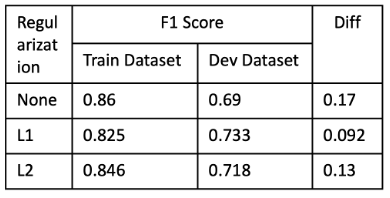

* Examining the three classifiers based on regularization:
    * None: Highest F1 performance on Training Dataset, but Poor F1 performance on development dataset. Indicates overfitting.
    * L1: Highest F1 performance on Development Dataset. This regularization helps reduce overfitting.
    * L2: The L2 regularization reduces overfitting but not as much compared to L1 regularization.
    
* Based on the above observations the L1 Regularization Classifier performed the best.
    

###### v) Inspect the weight vector of the classifier with L1 regularization. What are the most important words for deciding whether a tweet is about a real disaster or not?

In [67]:
logreg = LogisticRegression(penalty = 'l1', max_iter = 10000, solver = 'liblinear', random_state=90)
logreg.fit(x_train_bag, y_train)
log_wt_vec = logreg.coef_.transpose() #Weight Vector
#Sorting least and most important words.
word_coefs = pd.DataFrame(log_wt_vec, count_vect.get_feature_names_out(), columns = ['coeffs']).sort_values(by = 'coeffs')
print(word_coefs)

              coeffs
super      -2.277179
panic      -1.896563
book       -1.895477
ebay       -1.828433
technology -1.710299
...              ...
spill       3.269936
typhoon     3.276998
hiroshima   3.307323
swallow     3.492141
debris      3.628438

[1215 rows x 1 columns]


* Most important words for deciding whether a tweet is a disaster:
    * spill
    * typhoon
    * hiroshima
    * swallow
    * debris
    
* Least important words for deciding whether a tweet is a disaster:
    * super
    * panic
    * book
    * ebay
    * technology

### (f) Bernoulli Naive Bayes.

In [71]:
count_vect = CountVectorizer(binary=True, min_df = 8)
x_train_bnb = count_vect.fit_transform(x_train['text']).toarray()
x_test_bnb = count_vect.transform(x_dev['text']).toarray()

In [72]:
x_train_bnb.shape

(5329, 1215)

In [85]:
def nb_params(bag, Y):
    n = bag.shape[0] 
    d = bag.shape[1] 
    K = 2 
    alpha = 1

    psis = np.zeros([K,d])
    phis = np.zeros([K])

    for k in range(K):
        X_k = bag[Y == k]
        print(X_k)
        num_documents = np.sum(Y == k)
        psis[k] = (np.sum(X_k, axis=0) + alpha)/(num_documents + 2*alpha)
        phis[k] = X_k.shape[0] / float(n)
    print(phis)
    return psis, phis

In [86]:
def nb_predictions(x, psis, phis):
    n, d = x.shape
    K = 2
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    psis = psis.clip(1e-14, 1-1e-14)
    
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

In [87]:
psis, phis = nb_params(x_train_bnb, y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.56802402 0.43197598]


In [88]:
#Predictions on Training Data using Naive Bayes
idx_train, logpyx_train = nb_predictions(x_train_bnb, psis, phis)
print('F1 score: Training Data', sklearn.metrics.f1_score(y_train, idx_train))

F1 score: Training Data 0.7777777777777777


In [89]:
#Predictions on Development Data using Naive Bayes
idx_test, logpyx_test = nb_predictions(x_test_bnb, psis, phis)
print('F1 score: Development Data ', sklearn.metrics.f1_score(y_dev, idx_test))

F1 score: Development Data  0.7170249854735619


### (g) Model Comparison

Q1) Which model performed the best in predicting whether a tweet is of a real disaster or not? Include your performance metric in your response. Comment on the pros and cons of using generative vs discriminative models.

Performance Metric: 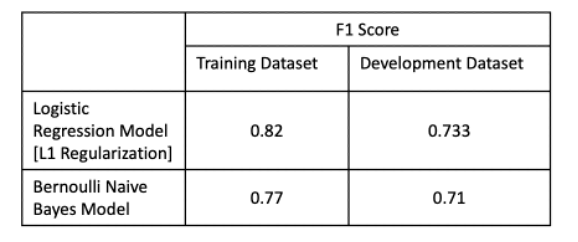

Based on the above performance metrics, the Logistic Regression model with L1 regularization performed better in predicting whether a tweet indicated a real disaster or not. The logistic regression model had a better F1 score on both the training and development dataset.

* DISCRIMINATIVE MODEL: [eg - logistic regression]
    * Pros:
        * Need less data
        * Computationally Cheaper
        * Usually more accurate
        * More robust to outliers
    * Cons: 
        * Prone to misclassification of data
        
* GENERATIVE MODEL: [eg - naive bayes]
    * Pros:
        * Can tackle a more complex task
        * Capable of generating new data points
    * Cons: 
        * Presence of outliers negatively affects the performance

### (h) N-gram Model

In [95]:
def find_threshold_ngram(penalty):
    mindf = (0,0)
    for i in range(1,40,1):
   
        count_vect = CountVectorizer(binary=True, min_df = i, ngram_range = (1,2))
        x_train_bag = count_vect.fit_transform(x_train['text'])
        x_test_bag = count_vect.transform(x_dev['text'])

        if penalty == 'l1':   
            logreg = LogisticRegression(penalty = penalty, random_state = 90, solver = 'liblinear', max_iter = 10000)
        else:
            logreg = LogisticRegression(penalty = penalty, random_state = 90, solver = 'lbfgs', max_iter = 10000)

        logreg.fit(x_train_bag, y_train) 
        y_train_pred = logreg.predict(x_train_bag)
        y_test_pred = logreg.predict(x_test_bag)

        f1_train = sklearn.metrics.f1_score(y_train, y_train_pred)
        f1_test = sklearn.metrics.f1_score(y_dev, y_test_pred)

        if f1_test > mindf[1]:
            mindf = (i, f1_test)
        print('Threshold for Logistic Regression with ', penalty, 'regularization is ', mindf[0])
    return mindf[0]

In [116]:
find_threshold_ngram('l1')

Threshold for Logistic Regression with  l1 regularization is  1
Threshold for Logistic Regression with  l1 regularization is  2
Threshold for Logistic Regression with  l1 regularization is  2
Threshold for Logistic Regression with  l1 regularization is  4
Threshold for Logistic Regression with  l1 regularization is  5
Threshold for Logistic Regression with  l1 regularization is  6
Threshold for Logistic Regression with  l1 regularization is  7
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  l1 regularization is  8
Threshold for Logistic Regression with  

8

###### Q) Report the total number of 1-grams and 2-grams in your vocabulary

In [126]:
count_vect = CountVectorizer(binary=True, min_df = 8, ngram_range = (1,2))
x_train_bag = count_vect.fit_transform(x_train['text'])
print(len(count_vect.get_feature_names()))

1558


###### Q) Take 10 2-grams from your vocabulary, and print them out.

In [127]:
count_vect = CountVectorizer(binary=True, min_df = 8, ngram_range = (2,2))
x_train_bag = count_vect.fit_transform(x_train['text'])
x_test_bag = count_vect.transform(x_dev['text'])
print(count_vect.get_feature_names()[100:110])

['famine memory', 'fan army', 'fatal outbreak', 'fatal sh', 'faux leather', 'fear kill', 'fedex long', 'feel like', 'find la', 'find reunion']


###### Implement a logistic regression classifier to train on 2-grams.

In [120]:
logreg = LogisticRegression(penalty = 'l1', max_iter = 10000, solver = 'liblinear', random_state=90)
logreg.fit(x_train_bag, y_train)
y_train_pred = logreg.predict(x_train_bag)
y_test_pred = logreg.predict(x_test_bag)

In [122]:
print("F1 Score: Training Dataset",sklearn.metrics.f1_score(y_train, y_train_pred))
print("F1 Score: Development Dataset",sklearn.metrics.f1_score(y_dev, y_test_pred))

F1 Score: Training Dataset 0.486950986632718
F1 Score: Development Dataset 0.4085173501577287


###### Implement a Bernoulli classifier to train on 2-grams.

In [123]:
x_train_bag = x_train_bag.toarray()
x_test_bag = x_test_bag.toarray()
psis, phis = nb_params(x_train_bag, y_train)
idx_train, logpyx_train = nb_predictions(x_train_bag, psis, phis)
print('F1 Score: Training Dataset: ', sklearn.metrics.f1_score(y_train, idx_train))

idx_test, logpyx_test = nb_predictions(x_test_bag, psis, phis)
print('F1 Score: Development Dataset: ', sklearn.metrics.f1_score(y_dev, idx_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.56802402 0.43197598]
F1 Score: Training Dataset:  0.4550543299308529
F1 Score: Development Dataset:  0.3909531502423263


###### Report your results on training and development set. Do these results differ significantly from those using the bag of words model? Discuss what this implies about the task.

* Both the models, Logistic Regression and Bernoulii performed poorly when 2-gram was used as shown in the table below.

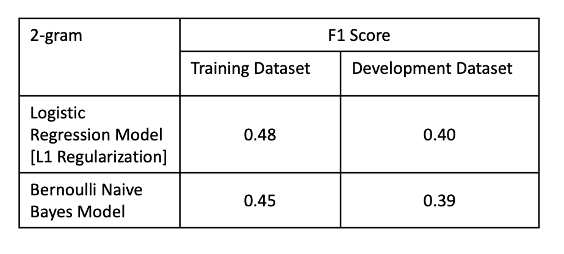

* The bag of words model performed much better compared to this model and the results differed significantly.
* Poor performance shown by the 2-gram model could be because when words have to be paired up together, important words which we saw previously [eg: spill, typhoon, hiroshima, swallow, debris] are considered not important in pairs because of other words they are paired with.

### (i) Determine performance with the test set 

Logistic regression with L1 regularization on Bag of Words model with threshold M=8

In [133]:
x_train = train_data.drop('target', axis=1)
y_train = train_data['target']
x_test = test_data

x_train['text'] = x_train['text'].apply(lambda x: str(x).lower())
x_dev['text'] = x_dev['text'].apply(lambda x: str(x).lower())
lemma_data(x_train, 'text')
lemma_data(x_dev, 'text')
x_train['text'] = x_train['text'].str.replace(r'[^\w\s]+', '')
x_dev['text'] = x_dev['text'].str.replace(r'[^\w\s]+', '')
x_train['text'] = x_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
x_dev['text'] = x_dev['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
x_train['text'] = x_train['text'].str.replace('http\S+|www.\S+', '', case=False)
x_dev['text'] = x_dev['text'].str.replace('http\S+|www.\S+', '', case=False)

count_vect = CountVectorizer(binary=True, min_df = 8)
x_train_bag = count_vect.fit_transform(x_train['text'])
x_test_bag = count_vect.transform(x_test['text'])

#L1 regularization term
logreg = LogisticRegression( solver = 'liblinear',penalty = 'l1', max_iter = 10000, random_state=90)
logreg.fit(x_train_bag, y_train) 
y_train_pred = logreg.predict(x_train_bag)

print("F1 Score: Training ",sklearn.metrics.f1_score(y_train, y_train_pred))

/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/204901242.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train['text'] = x_train['text'].str.replace(r'[^\w\s]+', '')
/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/204901242.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  x_dev['text'] = x_dev['text'].str.replace(r'[^\w\s]+', '')


Computed Training F1 score:  0.8207315072986715


/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/204901242.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  x_train['text'] = x_train['text'].str.replace('http\S+|www.\S+', '', case=False)
/var/folders/2h/rq97h6f13892n8d1xbpn4zzw0000gn/T/ipykernel_83413/204901242.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  x_dev['text'] = x_dev['text'].str.replace('http\S+|www.\S+', '', case=False)


In [135]:
#Predict Y for the test dataset
y_test_pred = logreg.predict(x_test_bag)
results = pd.DataFrame(y_test_pred)
results.insert(0, 'id', x_test['id'])
results.columns.values[1] = "target"
results.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [137]:
results.to_csv(path_or_buf = 'DisasterTweets_Predictions_Aashika.csv', sep = ',', index = False)

* Kaggle Submission Score: 0.76831
* This was higher than expected.
* When the same model was tested on the development dataset I got a score of 0.73
* The score may be higher than expected because I trained the model on a larger dataset [without the 70/30 split of the training dataset into training and development set]

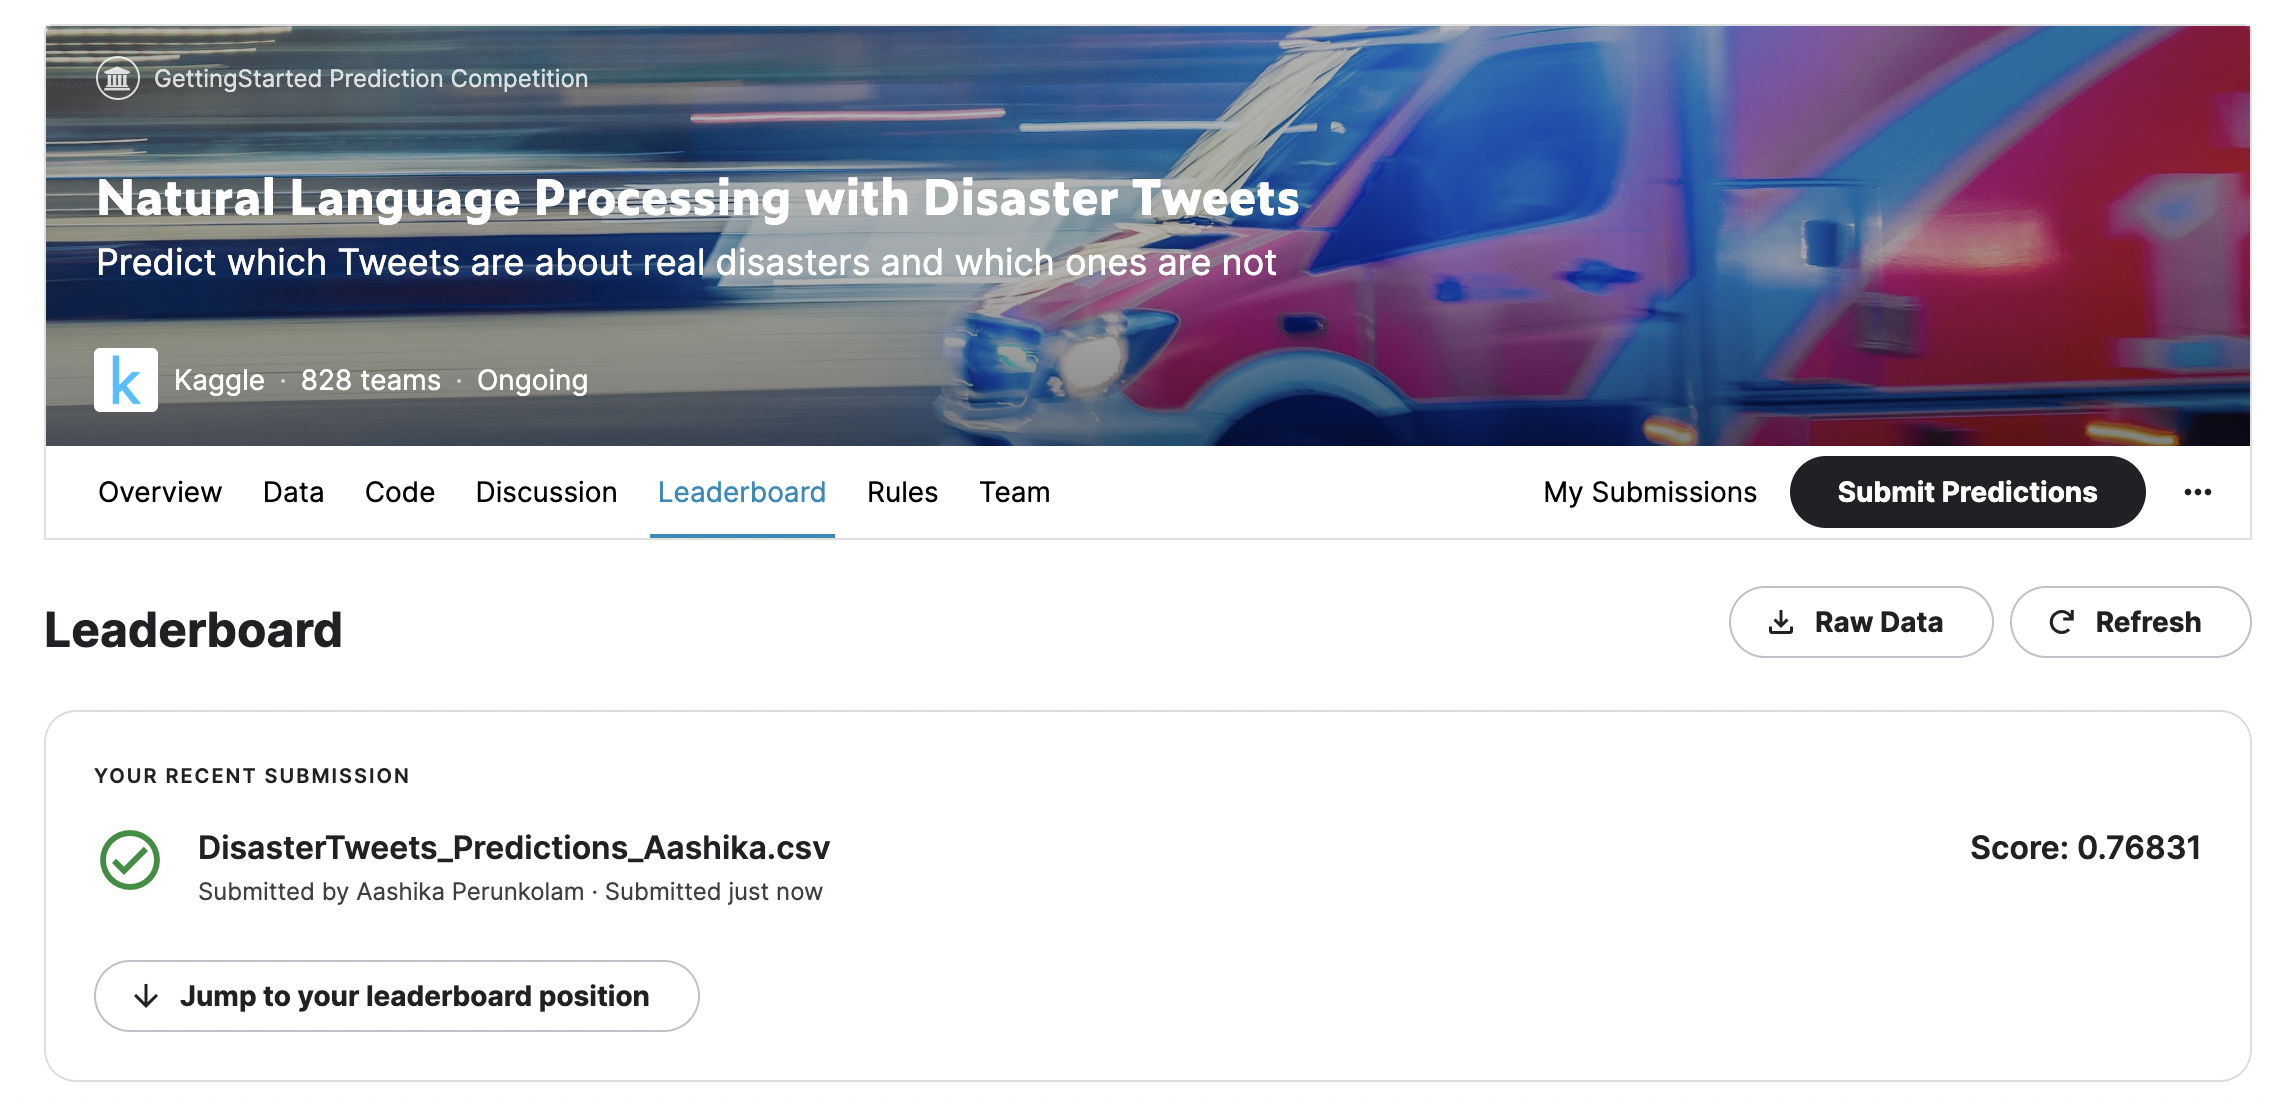